In [16]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Getting AR model 

**Generate white noise:** 
White noise is a sequence of random variables drawn from normal distribution with mean zero and variance one.

**Initialize the time series with zeros:** 
Initializes time series with zeros

**Set initial values:** 
It sets initial values of the time series. Since AR-model of order 'p' requires the previous 'p' values to generate the next value, the initial 'p' values are set 
randomly with constant term 'c'

**Generate values for the AR(p) process:**
Using the formula:
**yt[i] = c + phi * yt[i - 1] + eps[i]**,
the function computes values for the autoregressive process. Each value is dependent on the previous 'p' values and white noise.


In [17]:
def get_ar_model(c, p, n, phi, burnin=100):
    """
        Function get_ar_model generates values for an autoregressive (AR) time series
    model of order p
            Arguments:
                - c-- parameter represents the constant term of the AR model
                - p-- parameter denotes the order of autoregressive model
                - n-- number of values to generate
                - phi-- parameter represents the autoregressive coefficient
                - burnin -- number of initial values to discard

        Returns generated values for the AR model 
    """

    # Initialize the time series with zeros
    yt = np.zeros(n + burnin)
    for t in range (p, n+burnin):
        yt[t] = c + np.dot(phi, yt[t-p:t][::-1]) + np.random.normal()
        
    return yt[burnin:]

In [18]:
def plot_acf_pacf(data, lags=40):
    fig, ax = plt.subplots(2, figsize=(10, 6))
    sm.graphics.tsa.plot_acf(data, lags=lags, ax=ax[0], zero= False)
    sm.graphics.tsa.plot_pacf(data, lags=lags, ax=ax[1], zero= False)
    ax[0].set_title('Autocorrection Function (ACF)')
    ax[1].set_title('Partial Autocorrection Function (PACF)')
    plt.tight_layout()
    plt.show()


In [19]:
n = 5000
yt_ar1 = get_ar_model(c=18, p=1, n=n, phi=[0.6])

In [20]:
def calculate_acf_pacf(data, lags=40):
    acf_values = sm.tsa.acf(data, nlags=lags)
    pacf_values = sm.tsa.pacf(data, nlags=lags)
    return acf_values, pacf_values

calculate_acf_pacf(yt_ar1)

(array([ 1.00000000e+00,  6.10031358e-01,  3.62938533e-01,  1.96992816e-01,
         9.25084259e-02,  5.23052539e-02,  4.63934981e-02,  3.38382747e-02,
         1.66956203e-02,  1.47469214e-02,  1.05206015e-02, -2.43633030e-03,
         1.12739091e-02,  2.09453783e-02,  1.05645729e-02,  8.18486628e-04,
         4.37876289e-04, -3.48685973e-03, -7.99404987e-04,  9.01819114e-03,
        -9.15027486e-03, -9.64717292e-03,  6.93209851e-04, -2.95943599e-03,
         1.39960932e-03,  1.42077232e-02,  1.63489701e-02,  8.52806284e-03,
        -9.39685801e-03, -6.32955223e-03, -1.12662985e-02, -1.54504932e-02,
        -1.03150224e-02, -8.66081672e-03, -1.69185441e-02, -2.46573577e-02,
        -1.40883355e-02, -1.84894490e-02, -7.96935006e-03, -2.72744091e-03,
        -5.74027609e-04]),
 array([ 1.00000000e+00,  6.10153388e-01, -1.46617847e-02, -2.98415462e-02,
        -1.99980491e-02,  2.06037118e-02,  2.62509620e-02, -7.39766247e-03,
        -1.28555746e-02,  1.27340375e-02,  1.33659563e-05, -1

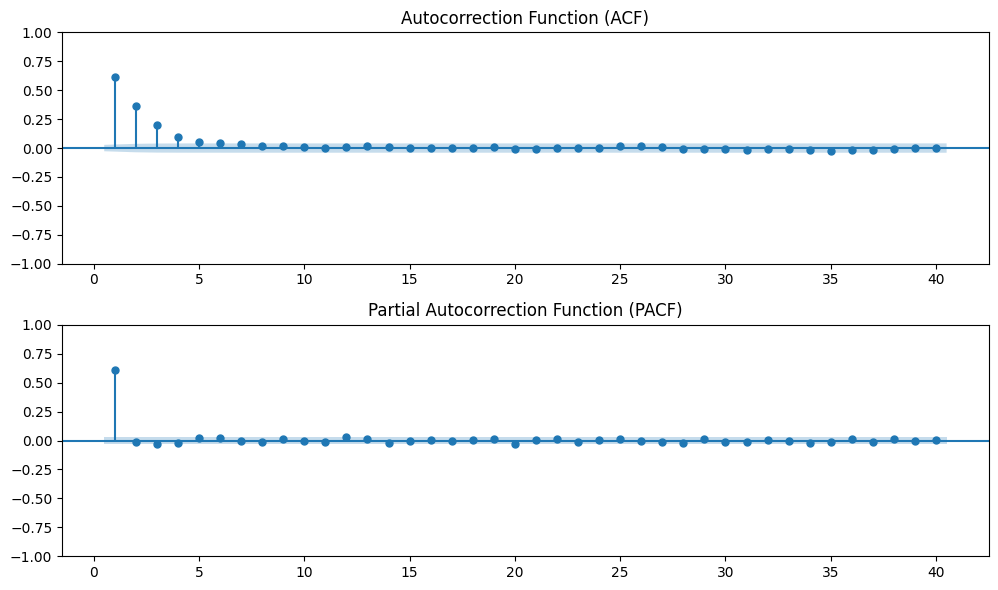

In [21]:
plot_acf_pacf(yt_ar1)

For phi = -0.7:


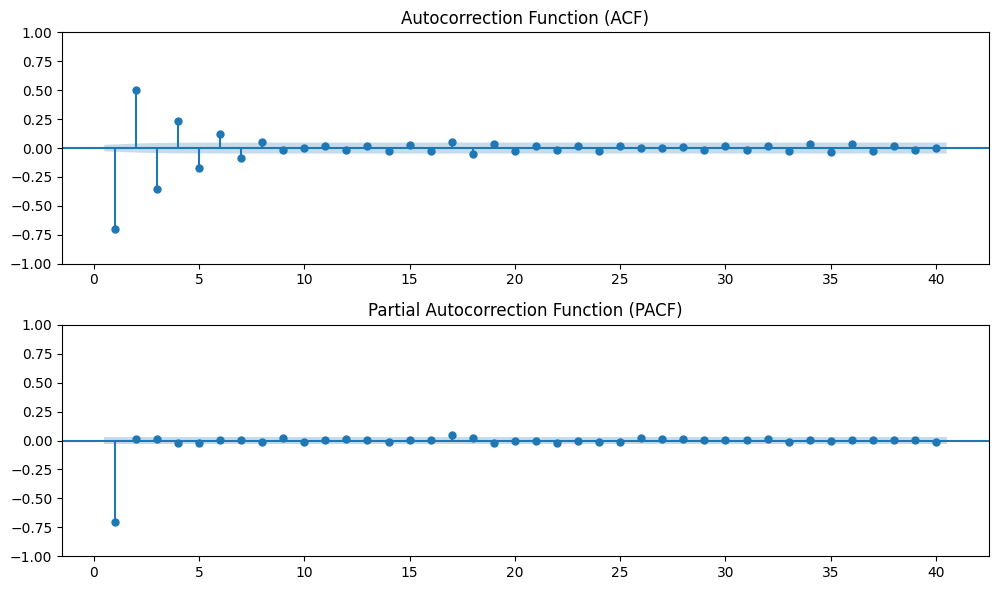

For phi = -0.8:


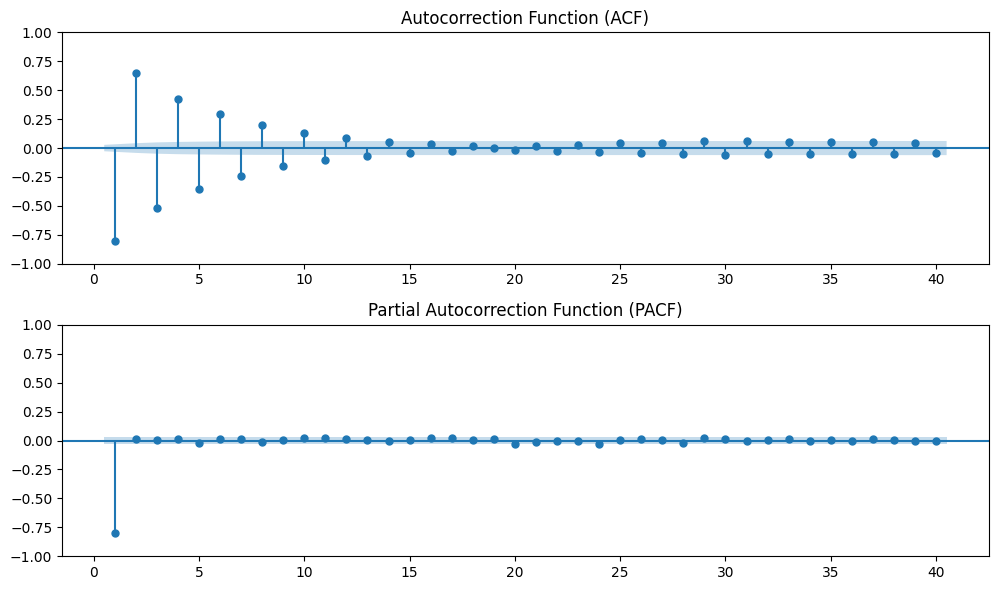

For phi = -0.9:


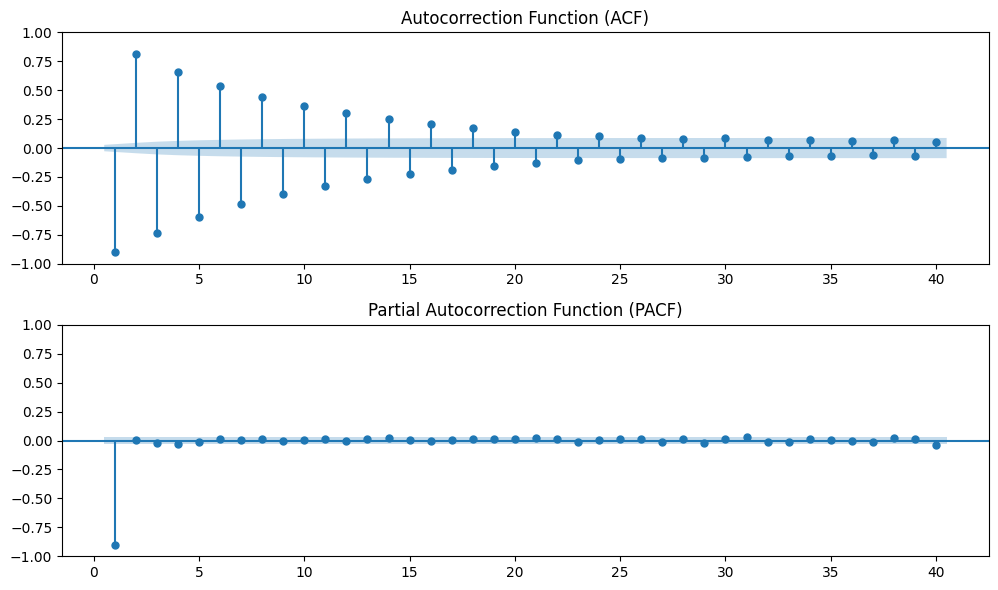

In [22]:
phis = [-0.7, -0.8, -0.9]
for phi in phis:
    yt_ar1 = get_ar_model(c= 18, p=1, n=n, phi=phi)
    print(f"For phi = {phi}:")
    plot_acf_pacf(yt_ar1)

In [23]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss

In [24]:
import warnings
warnings.filterwarnings("ignore")

# Are time series stationary or non-stationary?

***Augmented Dickey-Fuller (ADF) Test:***

> - Null Hypothesis (H0): The time series has a unit root, indicating it is non-stationary.
> - Alternative Hypothesis (H1): The time series does not have a unit root, indicating it is stationary.
> - If the p-value obtained from the test is less than a chosen significance level (typically 0.05), we reject the null hypothesis. In other words, if p-value < 0.05, we can consider the series as stationary; otherwise, we fail to reject the null hypothesis, suggesting that the series is non-stationary.
Example interpretation:

 - If adf_result[1] < 0.05, then the series is likely stationary.
 - If adf_result[1] >= 0.05, then the series is likely non-stationary.

***KPSS Test:***

> - Null Hypothesis (H0): The time series is stationary around a deterministic trend.
> - Alternative Hypothesis (H1): The time series has a unit root, indicating it is non-stationary.
> - If the p-value obtained from the test is less than a chosen significance level (typically 0.05), we reject the null hypothesis. In other words, if p-value < 0.05, we consider the series as non-stationary; otherwise, we fail to reject the null hypothesis, suggesting that the series is stationary.
Example interpretation:

 - If kpss_result[1] < 0.05, then the series is likely non-stationary.
 - If kpss_result[1] >= 0.05, then the series is likely stationary.

In [25]:
phis = [-0.7, -0.8, -0.9, 1]

for phi in phis:
    model = get_ar_model(c=18, p=1, n=n, phi=phi)
    ljung_box = acorr_ljungbox(model, lags=[40], return_df=True)
    adf_result = adfuller(model)
    kpss_result = kpss(model)
    
    if adf_result[1] < 0.05 or kpss_result[1] > 0.05:
        print("The time series for phi =", phi, "is stationary.")
    else:
        print("The time series for phi =", phi, "is non-stationary.")

    
    

The time series for phi = -0.7 is stationary.
The time series for phi = -0.8 is stationary.
The time series for phi = -0.9 is stationary.
The time series for phi = 1 is non-stationary.


****When phi>=1 then our series is non-stationary****

In [26]:
def get_ma_model1(c, n, q, theta, burnin=100):
    """
    Generate a moving average (MA) model for a given time series data.

    Parameters:
    - c: Constant term.
    - n: Number of time steps.
    - q: The order of the moving average model.
    - theta: Numpy array representing the random noise.
    - burnin: Number of initial values to discard.

    Returns:
    - ma_model: A numpy array representing the moving average model.
    """
    
    eps = np.random.normal(size=n + burnin)
    ma_model = np.zeros(n + burnin)

    for t in range(q, n + burnin):
        ma_model[t] = c + eps[t] + np.dot(theta, eps[t - q:t][::-1])

    return ma_model[burnin:]

In [27]:
def get_ma_model2(n, q, theta, burnin=0):
    """
    Generate a moving average (MA) model for a given time series data.

    Parameters:
    - c: Constant term.
    - n: Number of time steps.
    - q: The order of the moving average model.
    - theta: Numpy array representing the random noise.
    - burnin: Number of initial values to discard.

    Returns:
    - ma_model: A numpy array representing the moving average model.
    """
    np.random.seed(0)
    eps = np.random.normal(size=n + burnin)
    ma_model = np.zeros(n + burnin)

    for t in range(q, n + burnin):
        ma_model[t] =eps[t]-eps[t - q] + np.dot(theta, eps[t - q:t][::-1])

    return ma_model[burnin:]

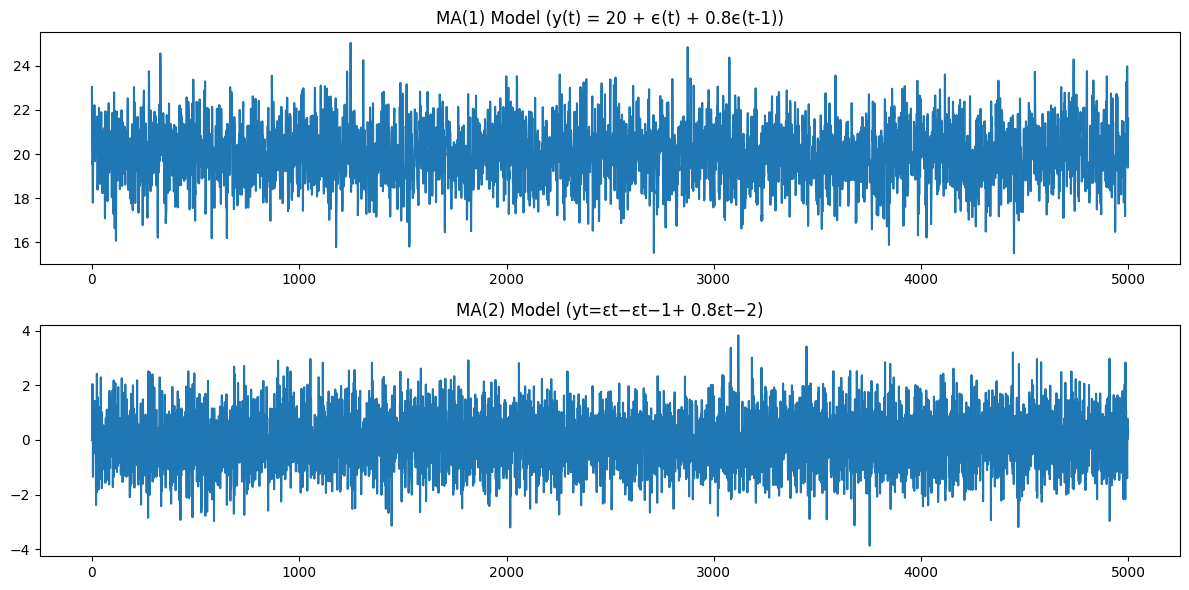

In [28]:
ma1_data = get_ma_model1(20, 5000, 1, 0.8)
# Generate MA(2) model
ma2_data2 = get_ma_model2(5000, 1, 0.8)
# Plot MA(1) and MA(2) time series
fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0].plot(ma1_data)
ax[0].set_title('MA(1) Model (y(t) = 20 + ϵ(t) + 0.8ϵ(t-1))')
ax[1].plot(ma2_data2)
ax[1].set_title('MA(2) Model (yt=εt−εt−1+ 0.8εt−2)')
plt.tight_layout()
plt.show()

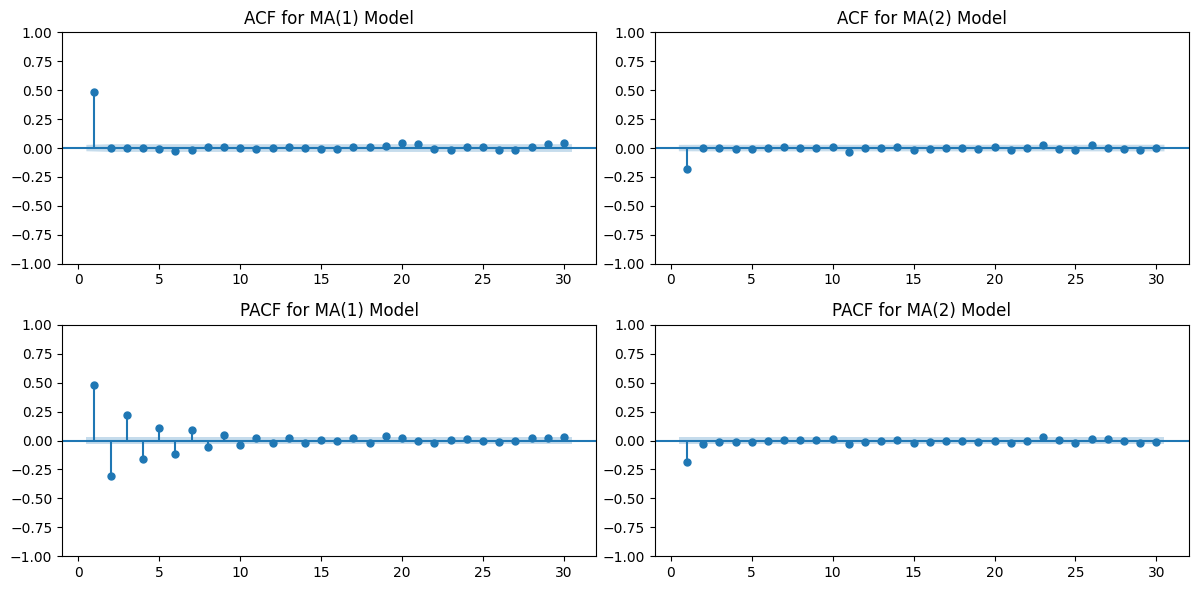

In [29]:
# Calculate ACF and PACF for MA(1) model
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
plot_acf(ma1_data, lags=30, title='ACF for MA(1) Model', ax=ax[0, 0], zero=False)
plot_pacf(ma1_data, lags=30, title='PACF for MA(1) Model', ax=ax[1, 0], zero=False)
plot_acf(ma2_data2, lags=30, title='ACF for MA(2) Model', ax=ax[0, 1], zero=False)
plot_pacf(ma2_data2, lags=30, title='PACF for MA(2) Model', ax=ax[1, 1], zero=False)
plt.tight_layout()
plt.show()


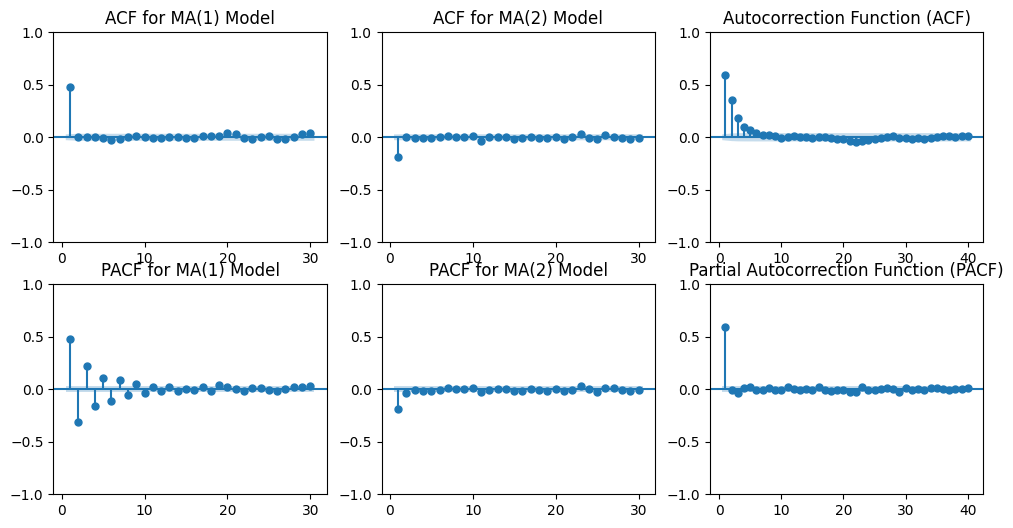

In [30]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ar_model = get_ar_model(c=18, p=1, n=n, phi=0.6)
plot_acf(ma1_data, lags=30, title='ACF for MA(1) Model', ax=ax[0, 0], zero=False);
plot_pacf(ma1_data, lags=30, title='PACF for MA(1) Model', ax=ax[1, 0], zero=False);
plot_acf(ma2_data2, lags=30, title='ACF for MA(2) Model', ax=ax[0, 1], zero=False);
plot_pacf(ma2_data2, lags=30, title='PACF for MA(2) Model', ax=ax[1, 1], zero=False);
sm.graphics.tsa.plot_acf(ar_model, lags=40,title='Autocorrection Function (ACF)', ax=ax[0,2], zero= False);
sm.graphics.tsa.plot_pacf(ar_model, lags=40,title='Partial Autocorrection Function (PACF)', ax=ax[1,2], zero= False);